# **Data Preprocessing, Visualization and Dimensionality Deduction**

## 0. Introduction
此项目将对一家杂货公司的数据库中的客户记录进行数据聚类分析。客户细分是将客户分成反映每个集群中客户之间相似性的组的做法。我们将客户划分为不同的类别，以优化每个客户对业务的重要性，进而根据客户的不同需求和行为修改产品，同时也有助于企业满足不同类型客户的需求。


该notebook文件实现了对数据的清洗、预处理和可视化，在此基础上，进一步使用PCA对数据进行降维处理，方便更好的进行聚类分析。

## 1. Import Libraries and Data Load

需要的库

!pip install scikit-learn  
!pip install pandas  
!pip install numpy  
!pip install matplotlib  
!pip install seaborn  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors,cm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(53)

In [ ]:
data = pd.read_csv("../datasets/marketing_campaign.csv", sep="\t")
print("Data shape: ", data.shape)
data.head()

Data shape:  (2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### 数据解释：
 - People（个人属性）
    - ID：客户的唯一标识符
    - Year_Birth：客户的出生年份
    - Education：客户的教育水平
    - Marital_Status：客户的婚姻状况
    - Income：客户的年度家庭收入
    - Kidhome：客户家庭中儿童的数量
    - Teenhome：客户家庭中青少年的数量
    - Dt_Customer：客户加入公司的日期
    - Recency：客户上次购买后的天数
    - Complain：过去两年内客户是否投诉（1 表示投诉，0 表示没有投诉）
 - Products（产品属性）
   - MntWines：过去两年内在葡萄酒上的消费金额
   - MntFruits：过去两年内在水果上的消费金额
   - MntMeatProducts：过去两年内在肉类产品上的消费金额
   - MntFishProducts：过去两年内在鱼类产品上的消费金额
   - MntSweetProducts：过去两年内在糖果上的消费金额
   - MntGoldProds：过去两年内在黄金产品上的消费金额
 - Promotion（促销属性）
    - NumDealsPurchases：以折扣价购买的次数
    - AcceptedCmp1：客户是否接受了第一次促销活动的优惠（1 表示接受，0 表示未接受）
    - AcceptedCmp2：客户是否接受了第二次促销活动的优惠（1 表示接受，0 表示未接受）
    - AcceptedCmp3：客户是否接受了第三次促销活动的优惠（1 表示接受，0 表示未接受）
    - AcceptedCmp4：客户是否接受了第四次促销活动的优惠（1 表示接受，0 表示未接受）
    - AcceptedCmp5：客户是否接受了第五次促销活动的优惠（1 表示接受，0 表示未接受）
    - Response：客户是否接受了最后一次促销活动的优惠（1 表示接受，0 表示未接受）
  - Place（购买方式）
    - NumWebPurchases：通过公司网站进行的购买次数
    - NumCatalogPurchases：通过目录进行的购买次数
    - NumStorePurchases：直接在商店内的购买次数
    - NumWebVisitsMonth：过去一个月内访问公司网站的次数



## 2. Data Cleaning and Prepocessing
 - Data Cleaning
 - Feature Engineering

**观察上方的数据可以发现：**
 - 收入（Income）字段存在缺失值。
 - Dt_Customer 字段表示客户加入数据库的日期，但尚未解析为日期时间格式（DateTime）。
 - 数据中存在一些分类特征（字段类型为 object），需要将这些特征编码为数值形式。

In [4]:
# 删除缺失值N/A
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

In [5]:
# 将DT_Customer转换为日期格式
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], format="%d-%m-%Y", dayfirst=True)
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
#创建一个新的列表示客户加入的天数
data["Customer_For"] = days 
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

In [6]:
# 数据中一些详细信息
print("Total categories about Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("Total categories about Education:\n", data["Education"].value_counts())

Total categories about Marital_Status:
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total categories about Education:
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


### Feature Enginnering
 - 新增特征：
     - 客户年龄：根据客户的出生年份计算年龄。
     - 总支出：将客户在各种商品上的支出金额求和，得到总支出特征。
     - 生活状态：通过婚姻状态推导客户是否与他人同住。
     - 子女数量：根据家庭中儿童和青少年的数量计算总子女数量。
     - 家庭总人数：根据生活状态和子女数量计算家庭总人口。
     - 是否为父母：根据子女数量确定客户是否为父母。
  
 - 特征分组与重命名：
     - 教育程度分组：将教育水平分为三类：本科以下、本科、研究生及以上。
     - 重命名特征：将商品消费相关特征列名简化为单词，例如将 MntWines 改为 Wines。

 - 冗余特征处理：
     - 删除了一些不必要的或无用的特征，如婚姻状态、客户加入日期等。

In [7]:
# 计算客户的当前年龄
data["Age"] = 2024 - data["Year_Birth"]

# 计算客户在各种商品上的总支出
data["Spent"] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] + data["MntSweetProducts"] + data["MntGoldProds"]

# 根据婚姻状况推导生活状态 ("独居" 或 "伴侣同住")
data["Living_With"] = data["Marital_Status"].replace({
    "Married": "Partner",
    "Together": "Partner",
    "Absurd": "Alone",
    "Widow": "Alone",
    "YOLO": "Alone",
    "Divorced": "Alone",
    "Single": "Alone",
})

# 计算家庭中的子女总数
data["Children"] = data["Kidhome"] + data["Teenhome"]

# 计算家庭总人数（包含生活状态与子女数量）
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner": 2}) + data["Children"]

# 根据子女数量创建是否为父母的特征 (1 表示有子女，0 表示无子女)
data["Is_Parent"] = np.where(data.Children > 0, 1, 0)

# 将教育水平分为三类：本科以下、本科、研究生及以上
data["Education"] = data["Education"].replace({
    "Basic": "Undergraduate",
    "2n Cycle": "Undergraduate",
    "Graduation": "Graduate",
    "Master": "Postgraduate",
    "PhD": "Postgraduate",
})

# 重命名消费金额的特征列
data = data.rename(columns={
    "MntWines": "Wines",
    "MntFruits": "Fruits",
    "MntMeatProducts": "Meat",
    "MntFishProducts": "Fish",
    "MntSweetProducts": "Sweets",
    "MntGoldProds": "Gold",
})

# 删除冗余特征
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)
data.describe()


,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,3.054423e+16,55.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,1.749036e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,28.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,1.555200e+16,47.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,3.071520e+16,54.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,4.570560e+16,65.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,6.039360e+16,131.000000,2525.000000,3.000000,5.000000,1.000000


**绘图展示当前一些特征值之间的关系**

选定特征的相关性图


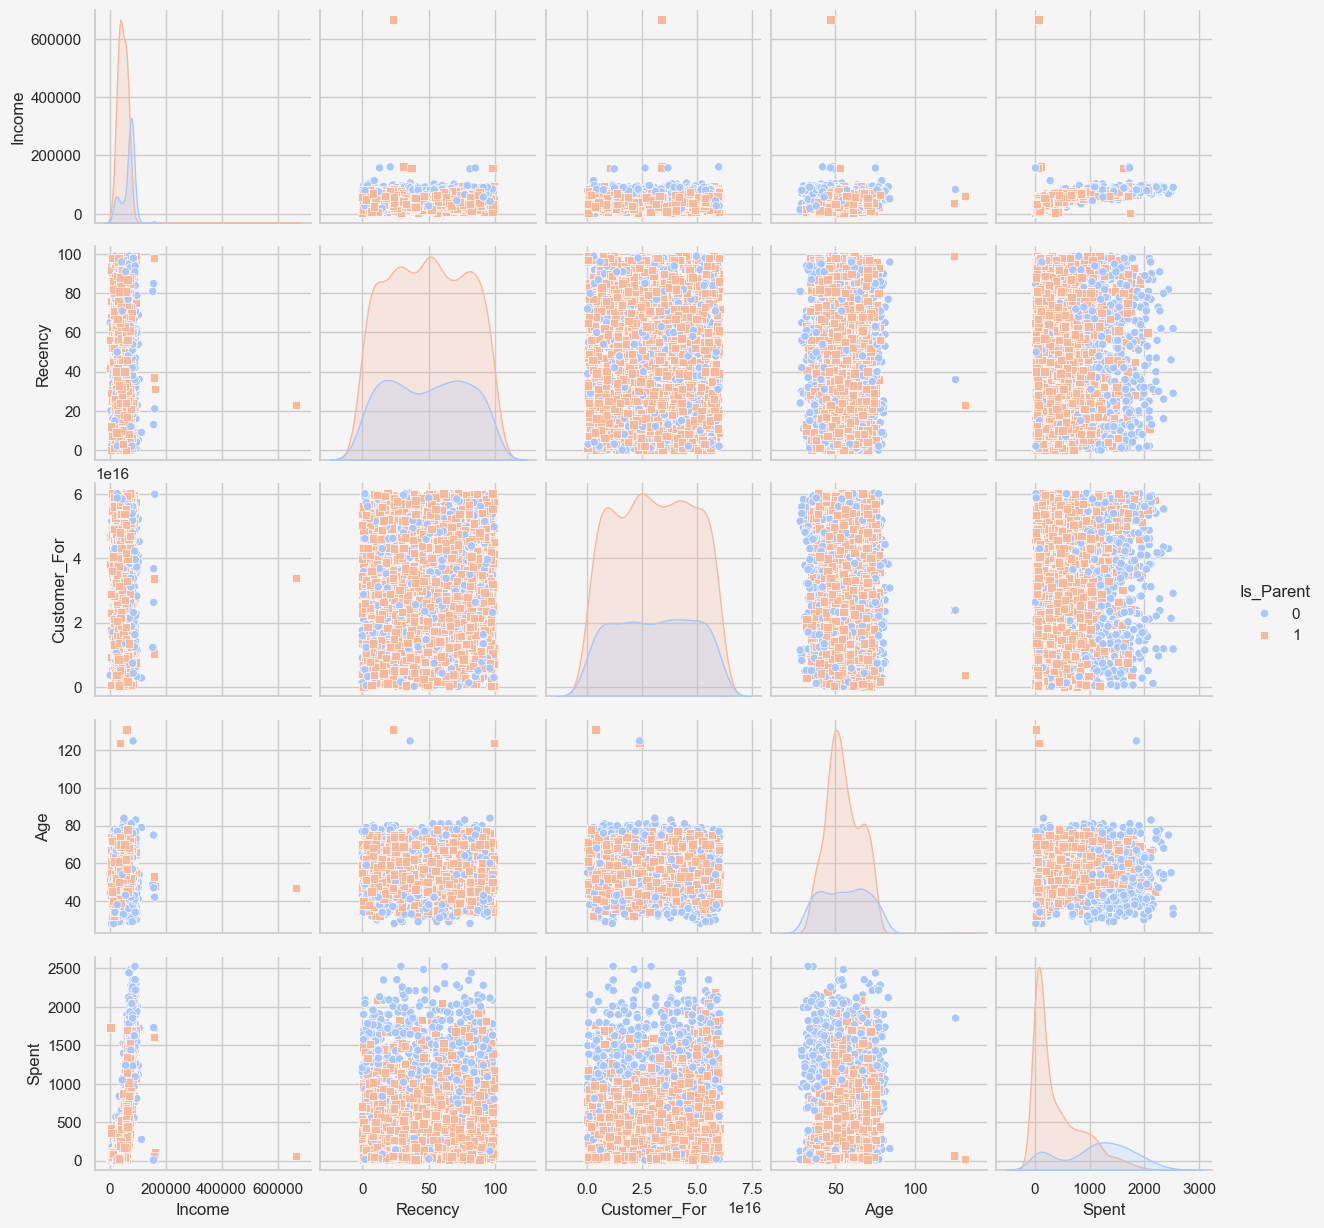

In [8]:
# 设置颜色
sns.set_theme(style="whitegrid", rc={"axes.facecolor": "#F5F5F5", "figure.facecolor": "#F5F5F5"})  # 白网格背景与灰白色面板


# 绘制的特征
To_Plot = ["Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("选定特征的相关性图")
sns.pairplot(
    data[To_Plot],
    hue="Is_Parent",
    palette="coolwarm", 
    diag_kind="kde",  # 对角线显示核密度估计
    markers=["o", "s"]  
)
plt.show()

显然，收入和年龄特征中存在一些异常值，后续删除数据中的异常值。

In [9]:
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print("删除异常值后数据条数:", len(data))

删除异常值后数据条数: 2212


In [10]:
# 对每个非数值列进行编码
cols = data.select_dtypes(include=["object"]).columns
for col in cols:
    data[col] = LabelEncoder().fit_transform(data[col])
print("非数值类型的列:", cols)

非数值类型的列: Index(['Education', 'Living_With'], dtype='object')


In [11]:
#  删除无用特征
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
data = data.drop(cols_del, axis=1)
# 标准化数据
scaler = StandardScaler()
scaler.fit(data)
data_scaled = pd.DataFrame(scaler.transform(data), columns=data.columns)
print("标准化后的数据:")
data_scaled.head()


标准化后的数据:


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.527721,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.189011,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.206048,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.060584,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.951915,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


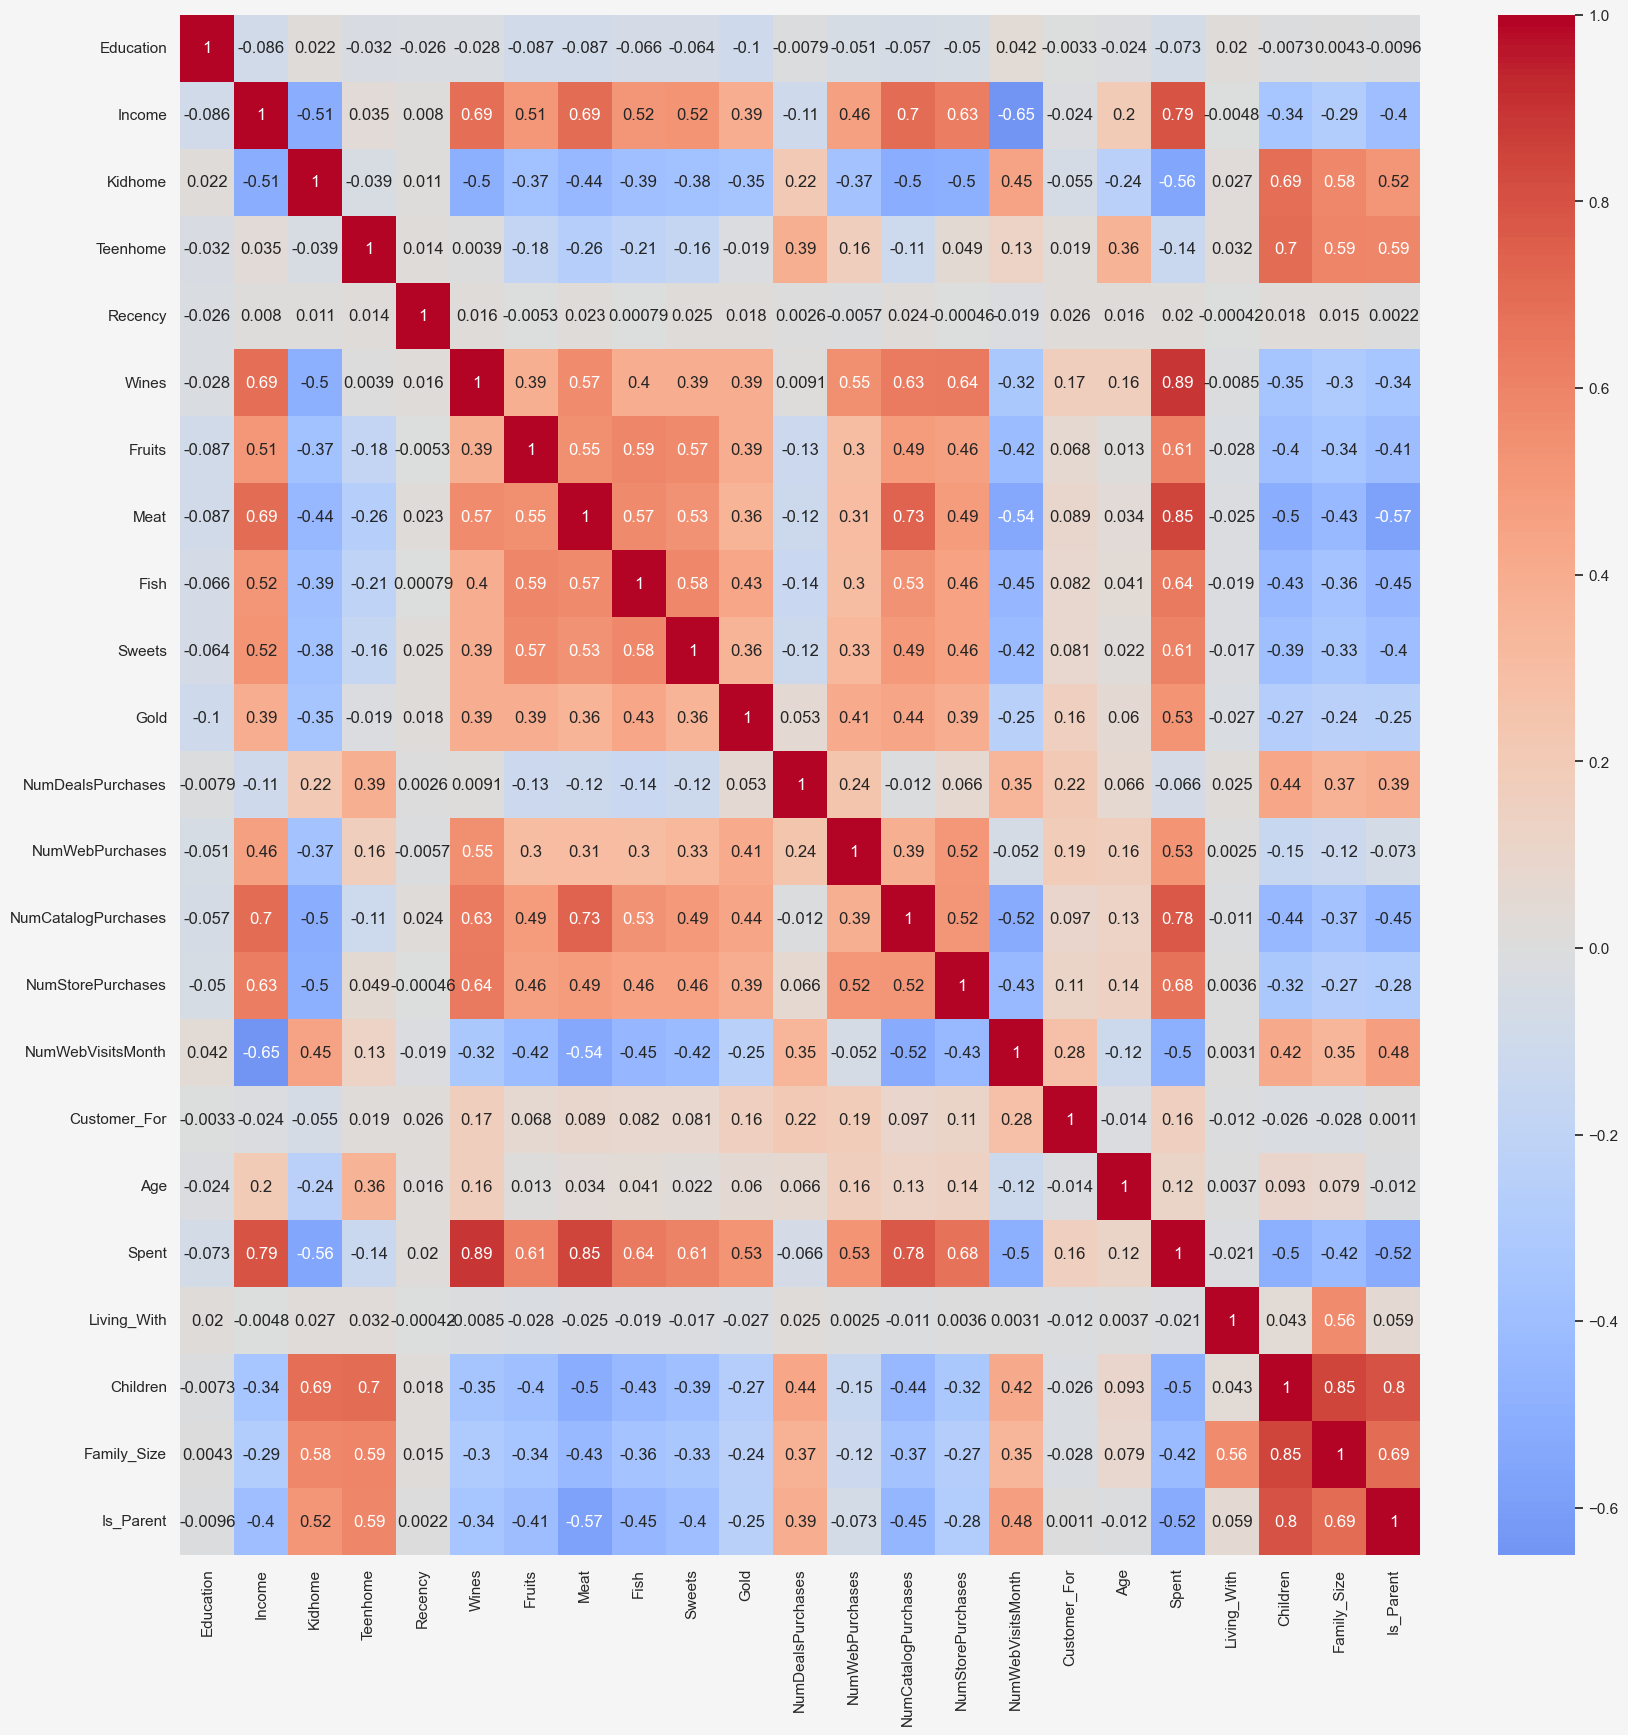

In [12]:
# 计算相关性矩阵
corrmat = data_scaled.corr()

# 绘制热力图
plt.figure(figsize=(20, 20))
sns.heatmap(corrmat, annot=True, cmap="coolwarm", center=0)
plt.show()

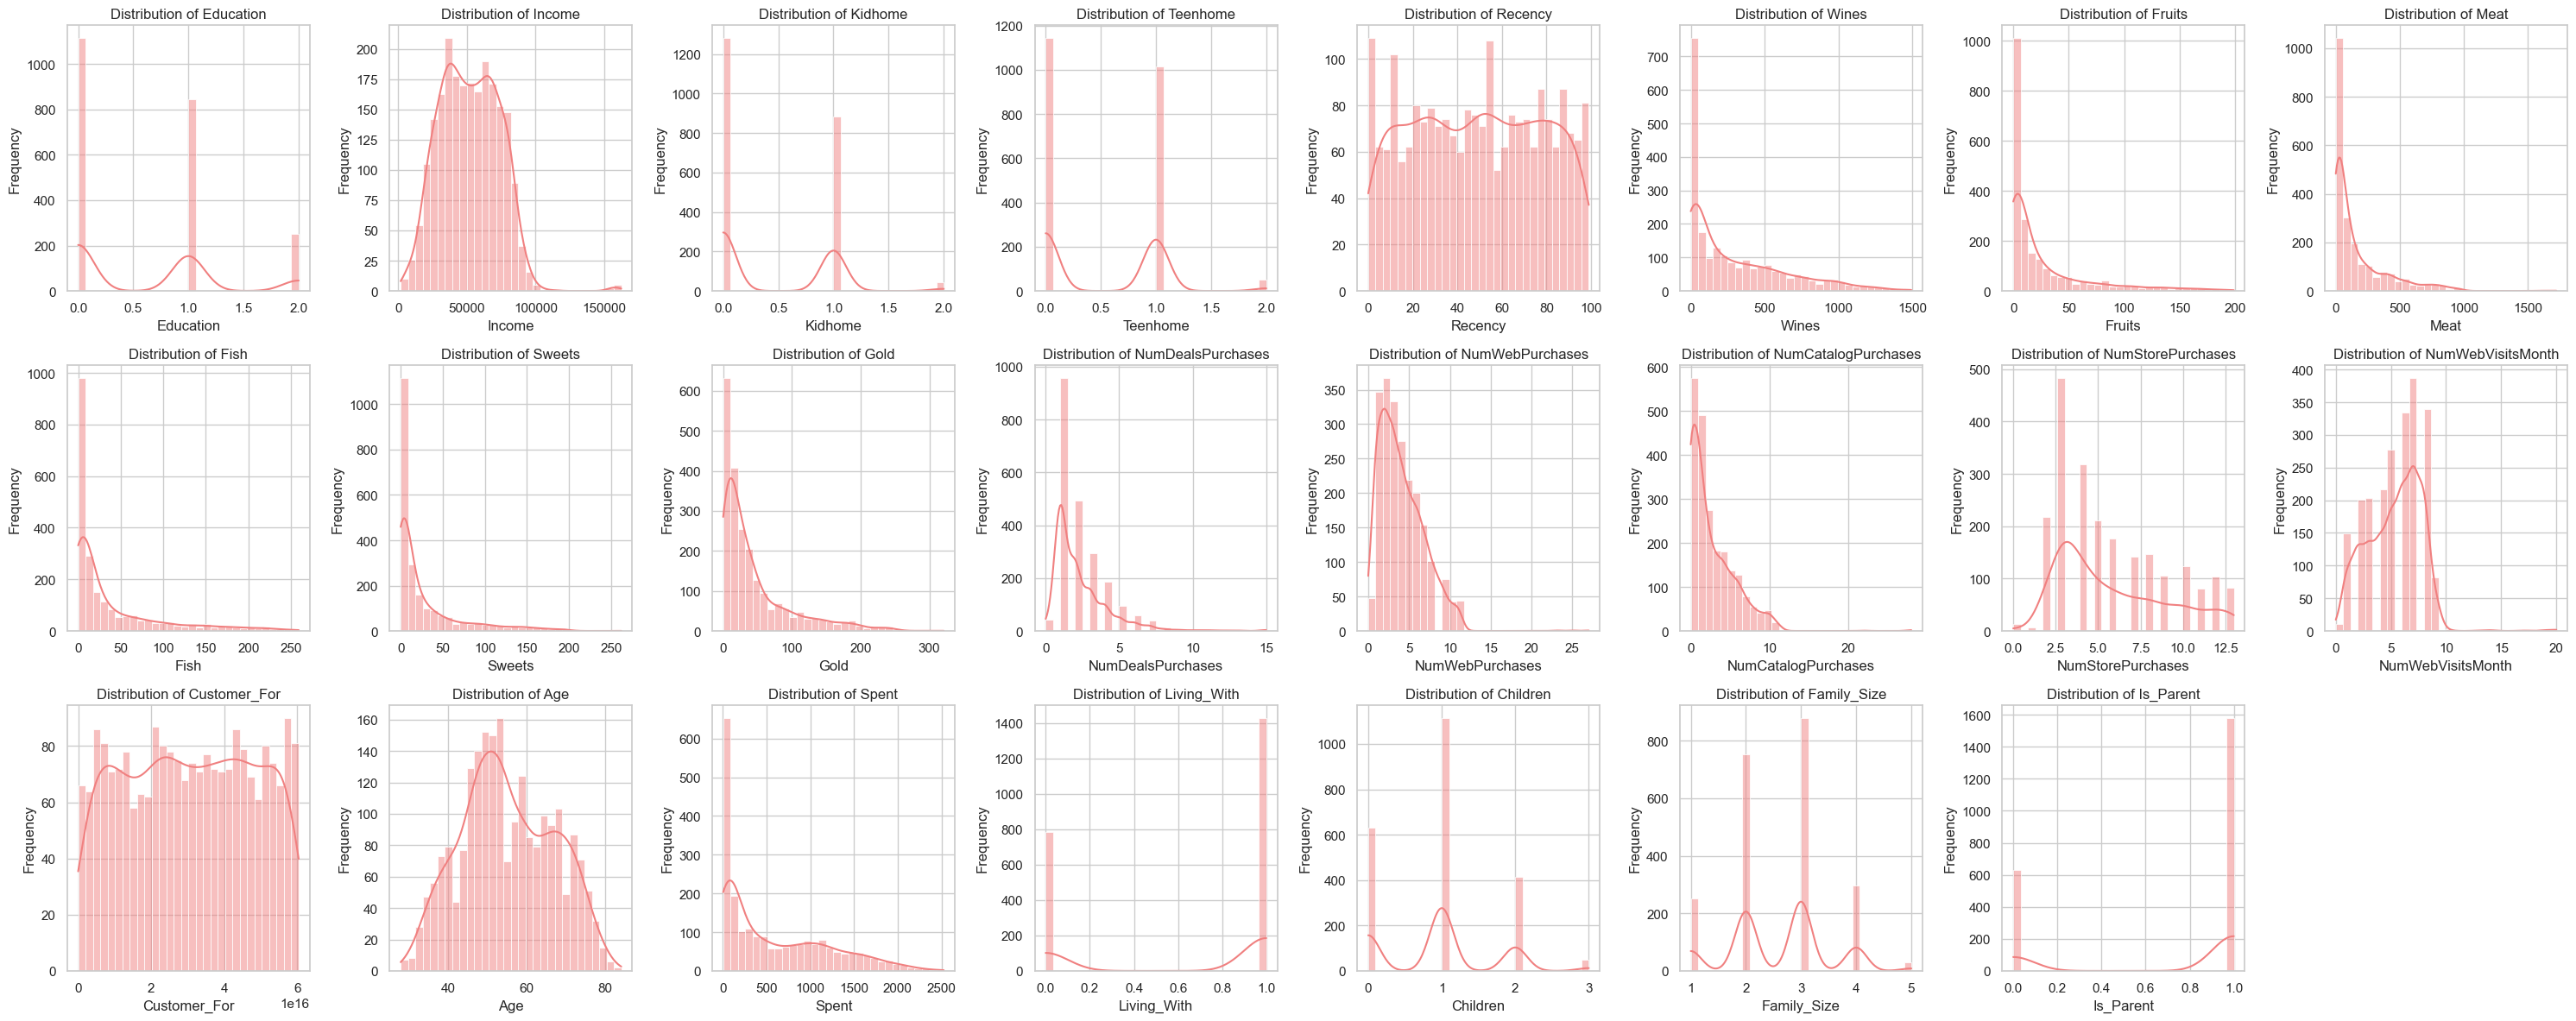

In [16]:
sns.set_theme(style="whitegrid")

num_columns = len(data.columns)
n_cols = 8  
n_rows = (num_columns + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(30, 4 * n_rows))
axes = axes.flatten()  # 将多维子图数组展平

# 绘制每列的分布图
for i, column in enumerate(data.columns):
    sns.histplot(data[column], kde=True, color="#f08080", bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frequency")
for j in range(len(data.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## 3. 数据降维

使用主成分分析（PCA）降低数据集维度，可以提高可解释性，同时最大限度地减少信息损失。

In [144]:
pca = PCA(n_components=3)
pca.fit(data_scaled)
PCA_data = pd.DataFrame(pca.transform(data_scaled), columns=(["col1","col2", "col3"]))
print("PCA处理前的数据形状：",data_scaled.shape)
print("PCA处理后的数据形状：",PCA_data.shape)
PCA_data.describe()

PCA处理前的数据形状： (2212, 23)
PCA处理后的数据形状： (2212, 3)


,col1,col2,col3
count,2.212000e+03,2.212000e+03,2.212000e+03
mean,2.569775e-17,5.139550e-17,-1.606109e-17
std,2.878602e+00,1.709469e+00,1.231687e+00
min,-5.978124e+00,-4.194757e+00,-3.625248e+00
25%,-2.539470e+00,-1.323929e+00,-8.537126e-01
50%,-7.815948e-01,-1.737210e-01,-5.084236e-02
75%,2.386380e+00,1.234851e+00,8.639740e-01
max,7.452915e+00,6.168189e+00,6.750458e+00


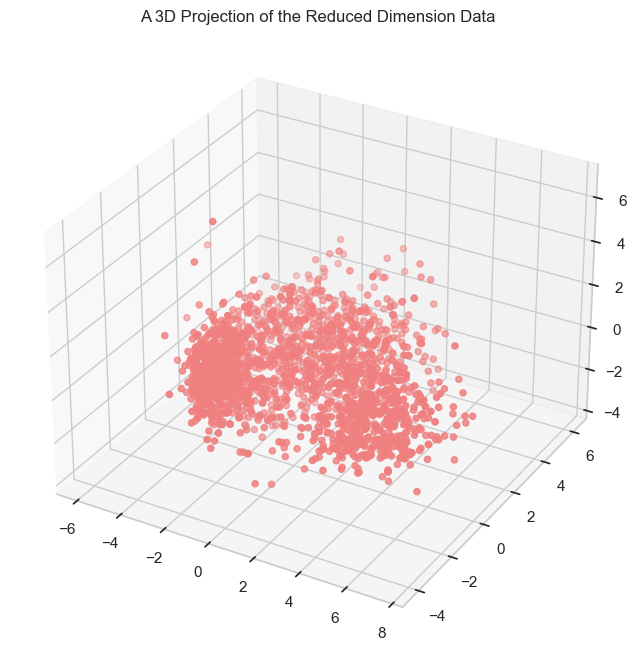

In [145]:
x =PCA_data["col1"]
y =PCA_data["col2"]
z =PCA_data["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y, z, c='#f08080', marker='o')
ax.set_title("A 3D Projection of the Reduced Dimension Data")
plt.show()

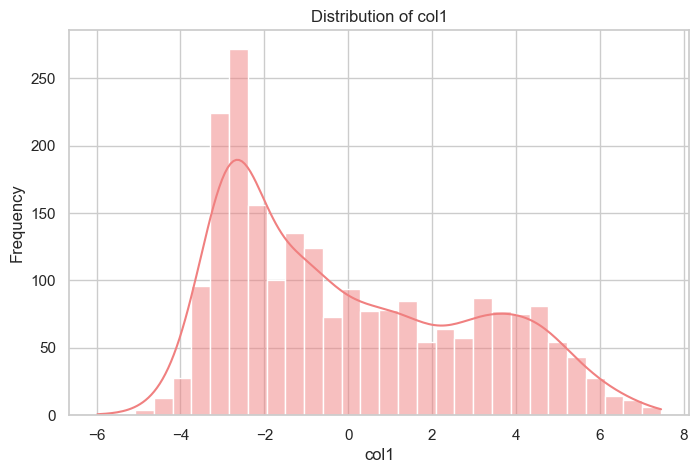

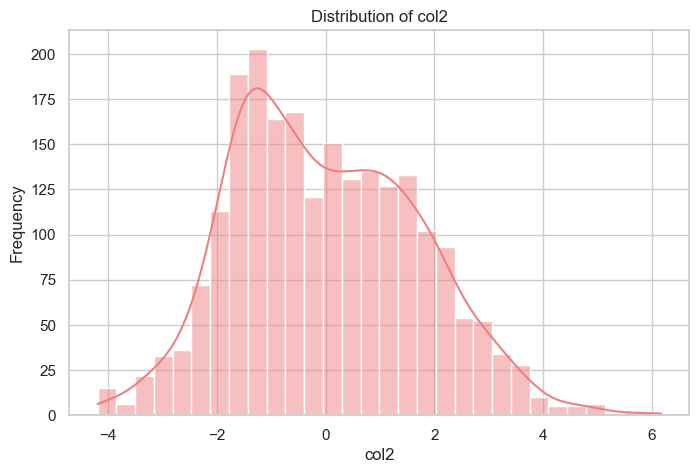

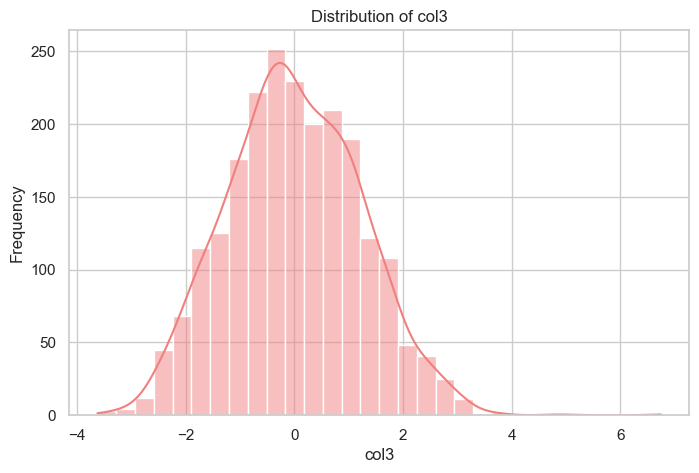

In [146]:
# 设置主题样式
sns.set_theme(style="whitegrid")

# 绘制每列的分布
for column in PCA_data.columns:
    plt.figure(figsize=(8, 5))  # 设置每个图的大小
    sns.histplot(PCA_data[column], kde=True, color="#f08080", bins=30)  # 绘制直方图和核密度估计
    plt.title(f"Distribution of {column}")  # 设置标题
    plt.xlabel(column)  # X轴标签
    plt.ylabel("Frequency")  # Y轴标签
    plt.show()

In [ ]:
PCA_data.to_csv("../datasets/processed_data_pca.csv", index=False)
data_scaled.to_csv("../datasets/processed_data_scaled.csv", index=False)
print("PCA 降维后的数据已保存到 '../datasets/processed_data.csv'")

PCA 降维后的数据已保存到 '../dataset/processed_data.csv'


In [ ]:
# 读取刚刚保存的 CSV 文件
loaded_data_pca = pd.read_csv("../datasets/processed_data_pca.csv")


print("数据预览：")
print(loaded_data_pca.head()) 
print("\n数据形状：", loaded_data_pca.shape)  
# 检查与保存前的数据是否完全一致
if np.allclose(loaded_data_pca.values, PCA_data.values, atol=1e-8):
    print("\n保存的数据与原始 PCA 数据一致！")
else:
    print("\n保存的数据与原始 PCA 数据仍存在差异！")

数据预览：
       col1      col2      col3
0  4.986336 -0.161514  2.445404
1 -2.874168  0.022697 -1.530795
2  2.615763 -0.731421 -0.264422
3 -2.654568 -1.455878 -0.398370
4 -0.656015  0.177864 -0.141286

数据形状： (2212, 3)

保存的数据与原始 PCA 数据一致！


In [ ]:
load_data_scaled = pd.read_csv("../datasets/processed_data_scaled.csv")

print("数据预览：")
print(load_data_scaled.head())
print("\n数据形状：", load_data_scaled.shape)
# 检查与保存前的数据
if np.allclose(load_data_scaled.values, data_scaled.values, atol=1e-8):
    print("\n保存的数据与原始标准化数据一致！")
else:
    print("\n保存的数据与原始标准化数据仍存在差异！")
    

数据预览：
   Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0  -0.893586  0.287105 -0.822754 -0.929699  0.310353  0.977660  1.552041   
1  -0.893586 -0.260882  1.040021  0.908097 -0.380813 -0.872618 -0.637461   
2  -0.893586  0.913196 -0.822754 -0.929699 -0.795514  0.357935  0.570540   
3  -0.893586 -1.176114  1.040021 -0.929699 -0.795514 -0.872618 -0.561961   
4   0.571657  0.294307  1.040021 -0.929699  1.554453 -0.392257  0.419540   

       Meat      Fish    Sweets  ...  NumCatalogPurchases  NumStorePurchases  \
0  1.690293  2.453472  1.483713  ...             2.503607          -0.555814   
1 -0.718230 -0.651004 -0.634019  ...            -0.571340          -1.171160   
2 -0.178542  1.339513 -0.147184  ...            -0.229679           1.290224   
3 -0.655787 -0.504911 -0.585335  ...            -0.913000          -0.555814   
4 -0.218684  0.152508 -0.001133  ...             0.111982           0.059532   

   NumWebVisitsMonth  Customer_For       Age     Spent  